# Project: Investigate a Dataset - TMDb movie data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 


>This data set contains information about 10,000 movies collected from The Movie Database (TMDb),including user ratings and revenue. This dataset has a total of 21 columns, some of them have single values like budget, revenue, runtime and release_date columns. While other columns are multi-valued such as keywords, production_companies, and genres. 


### Questions for Analysis:

#### 1- What are the most and least profitable movies?
#### 2- What is the average runtime of movies?
#### 3- What are the most successful genres?
#### 4- what are the movies with the hightest and lowest budgets?

In [41]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in c:\users\aya yasser\appdata\roaming\python\python37\site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [4]:
#first the dataset was loaded and stored into "df" variable.
df = pd.read_csv('tmdb-movies.csv', index_col = 'id')

#Then we displayed the first 5 rows of the dataset.
df.head()

,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,,,,,,,,,,,,,,
135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,06/09/2015,5562,6.5,2015,137999939.3,1.392446e+09
76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,137999939.3,3.481613e+08
262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,101199955.5,2.716190e+08
140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,183999919.0,1.902723e+09
168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,04/01/2015,2947,7.3,2015,174799923.1,1.385749e+09


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10866 entries, 135397 to 22293
Data columns (total 20 columns):
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              10866 non-null float64
revenue_adj       


### Data Cleaning Steps:
>1- Remove unused columns as: (imdb_id, vote_count, production_company, keywords, homepage, etc.)

>2- Remove all duplicate rows if they exist.

>3- Dispose of rows with zero budget or revenue.

>4- Modify the "release_date" column to date format.

>5- Replace all zero values with NANs in the runtime column.

>6- Modify the format of columns "budget" and "revenue".

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

### 1-  Remove unused columns

>**The columns that need to be dropped are**:
imdb_id, popularity, budget_adj, revenue_adj, homepage, keywords, overview, production_companies, vote_count and vote_average.

In [6]:
#create a list containing all the columns that need to be removed
del_col=['imdb_id', 'popularity', 'budget_adj', 'revenue_adj', 'homepage', 'keywords', 'overview', 'production_companies', 'vote_count', 'vote_average']

#delete the mentioned columns using the list
df = df.drop(del_col, 1)

In [7]:
#display the dataset after the modification
df.head()

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
id,,,,,,,,,,
135397,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,06/09/2015,2015
76341,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015
262500,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,3/18/15,2015
140607,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,2015
168259,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,04/01/2015,2015


### 2- Remove all duplicate rows if they exist.
> First check on the dataset to see if there's duplicate rows then delete them.

In [8]:
df.shape

(10866, 10)

In [9]:
#check how many duplicated rows are in the data.
df.duplicated().sum()

1

> Turns out there was one duplicate row. Next step will be deleting it.

In [10]:
df.drop_duplicates(inplace=True)

### 3- Dispose of rows with zero budget or revenue.

In [11]:
#first we make a list containing the columns to be removed.
cols = ['revenue', 'budget']

#change all the zeroes to nan in the data.
df[cols] = df[cols].replace(0, np.nan)

#remove all rows the value nan
df.dropna(subset = cols, inplace = True)

In [12]:
#check on the difference made 
df.shape

(3854, 10)

### 4- Modify the "release_date" column to date format.

In [13]:
df.release_date = pd.to_datetime(df['release_date'])

#check on the difference made to the data
df.head()

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
id,,,,,,,,,,
135397,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
76341,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
262500,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,2015-03-18,2015
140607,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015
168259,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,2015-04-01,2015


### 5- Replace all zero values with NANs in the runtime column.

In [14]:
df["runtime"] = df["runtime"].replace(0, np.nan)

### 6- Modify the format of columns "budget" and "revenue".

In [15]:
#first check on the current format for the budget and revenue columns
df.dtypes

budget                   float64
revenue                  float64
original_title            object
cast                      object
director                  object
tagline                   object
runtime                    int64
genres                    object
release_date      datetime64[ns]
release_year               int64
dtype: object

In [16]:
#make a list containing the columns to be modified.
change_type = ['budget', 'revenue']

#change the datatype to int to be read easier.
df[change_type] = df[change_type].applymap(np.int64)

#check on the changes made
df.dtypes

budget                     int64
revenue                    int64
original_title            object
cast                      object
director                  object
tagline                   object
runtime                    int64
genres                    object
release_date      datetime64[ns]
release_year               int64
dtype: object

In [17]:
df.head()

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
id,,,,,,,,,,
135397,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
76341,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
262500,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,2015-03-18,2015
140607,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015
168259,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,2015-04-01,2015


<a id='eda'></a>
## Exploratory Data Analysis



### 1- What are the most and least profitable movies?

> First calculate the profits for each movie


In [18]:
#make a new column to store the profits of all movies
df.insert(2, 'profits', df['revenue'] - df['budget'])

#confirm the column has been replaced correctly
df.head()

,budget,revenue,profits,original_title,cast,director,tagline,runtime,genres,release_date,release_year
id,,,,,,,,,,,
135397,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
76341,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
262500,110000000,295238201,185238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,2015-03-18,2015
140607,200000000,2068178225,1868178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015
168259,190000000,1506249360,1316249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,2015-04-01,2015


In [19]:
#make a function to calculate the wanted values
def calc_max_min(column):
    max_val = df[column].idxmax()
    max_df = pd.DataFrame(df.loc[max_val])
    
    min_val = df[column].idxmin()
    min_df = pd.DataFrame(df.loc[min_val])
    
    result_df = pd.concat([max_df, min_df], axis = 1)
    return result_df

#answer to question #1
calc_max_min('profits')

,19995,46528
budget,237000000,425000000
revenue,2781505847,11087569
profits,2544505847,-413912431
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
tagline,Enter the World of Pandora.,Assassin. Hero. Legend.
runtime,162,100
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller
release_date,2009-12-10 00:00:00,2010-12-02 00:00:00


### 2- What is the average runtime of movies?

In [20]:
# answer to question #2
df['runtime'].mean()

109.22029060716139

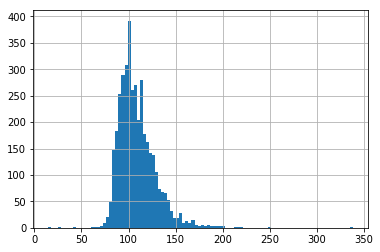

In [25]:
#show the answer using visualization


df.runtime.hist(bins = 100, )

> This is a right-skewed distribution. Most of the movies are between the duaration of 80 - 115 minutes. Also, there are a few outliers of 340 minutes and less than 50 minutes movies.

### 3- What are the most successful genres?

> This is one of the multi-valued columns. The values must be split up first.

In [69]:
genres_df = df['genres'].str.split("|", expand=True)

# Verifying successful separation 
genres_df.head()

,0,1,2,3,4
id,,,,,
135397,Action,Adventure,Science Fiction,Thriller,None
76341,Action,Adventure,Science Fiction,Thriller,None
262500,Adventure,Science Fiction,Thriller,None,None
140607,Action,Adventure,Science Fiction,Fantasy,None
168259,Action,Crime,Thriller,None,None


In [70]:
# Creating a separate dataframe form unique genres records.
genres_df = genres_df.stack()

genres_df = pd.DataFrame(genres_df)
genres_df.head()

0
id                       
135397 0           Action
       1        Adventure
       2  Science Fiction
       3         Thriller
76341  0           Action

In [71]:
genres_df.rename(columns={0:'genre'}, inplace=True)

In [72]:
#merge then the genres dataframe to the original dataset
df_merged = df.merge(genres_df,left_index=True, right_index=True)

In [73]:
df_merged.head()

budget     revenue     profits      original_title  \
id                                                                
135397 0  150000000  1513528810  1363528810      Jurassic World   
       1  150000000  1513528810  1363528810      Jurassic World   
       2  150000000  1513528810  1363528810      Jurassic World   
       3  150000000  1513528810  1363528810      Jurassic World   
76341  0  150000000   378436354   228436354  Mad Max: Fury Road   

                                                       cast         director  \
id                                                                             
135397 0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...  Colin Trevorrow   
       1  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...  Colin Trevorrow   
       2  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...  Colin Trevorrow   
       3  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...  Colin Trevorrow   
76341  0  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...    George Miller   

                     tagline  runtime  \
id                                      
135397 0   The park is open.      124   
       1   The park is open.      124   
       2   The park is open.      124   
       3   The park is open.      124   
76341  0  What a Lovely Day.      120   

                                             genres release_date  \
id                                                                 
135397 0  Action|Adventure|Science Fiction|Thriller   2015-06-09   
       1  Action|Adventure|Science Fiction|Thriller   2015-06-09   
       2  Action|Adventure|Science Fiction|Thriller   2015-06-09   
       3  Action|Adventure|Science Fiction|Thriller   2015-06-09   
76341  0  Action|Adventure|Science Fiction|Thriller   2015-05-13   

          release_year            genre  
id                                       
135397 0          2015           Action  
       1          2015        Adventure  
       2          2015  Science Fiction  
       3          2015         Thriller  
76341  0          2015           Action

In [74]:
df_merged.drop('genres', axis=1, inplace=True)

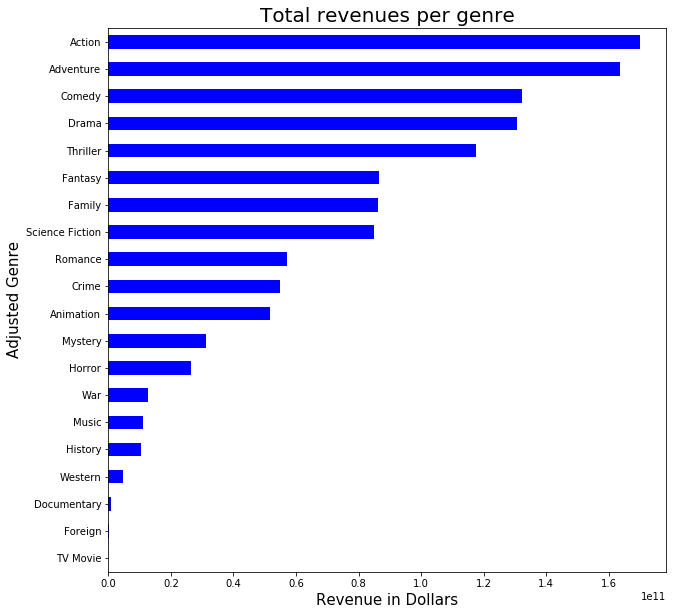

In [77]:
#now we answer the question
df_merged.groupby('genre').revenue.sum().sort_values().plot.barh(color='blue', figsize=(10,10), fontsize= 10)
plt.xlabel('Revenue in Dollars', fontsize= 15)
plt.ylabel('Adjusted Genre', fontsize= 15)
plt.title('Total revenues per genre', fontsize=20);

> From theis graph it is noticeable that Action, Adventure, and Comedy top the most revenue generating genres.

### 4- what are the movies with the hightest and lowest budgets?

In [68]:
#using the same fucnction of calc_max_min defined previously
calc_max_min('budget')

,46528,39964
budget,425000000,1
revenue,11087569,100
profits,-413912431,99
original_title,The Warrior's Way,Lost & Found
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,David Spade|Sophie Marceau|Ever Carradine|Step...
director,Sngmoo Lee,Jeff Pollack
tagline,Assassin. Hero. Legend.,A comedy about a guy who would do anything to ...
runtime,100,95
genres,Adventure|Fantasy|Action|Western|Thriller,Comedy|Romance
release_date,2010-12-02 00:00:00,1999-04-23 00:00:00


> For the highest budget movie "The Warrior's Way" is the winner, while "Lost & Found" is the movie with the least budget in the dataset.

<a id='conclusions'></a>
## Conclusions

> **Tip**:This was a very interesting case of data analysis. We came out with some very interesting facts about movies. After this analysis we can conclude following:
>1- To make a successful movie, it is better to make it either Action, Adventure or Comdey.
>2- Most of the movies are between the duaration of 80 - 115 minutes. However, there are a few outliers of 340 minutes and less than 50 minutes movies.

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])